# HW 2: Word Counting

In [11]:
!pip3 uninstall pyspark
!pip3 install pyspark==3.0.2

     |████████████████████████████████| 204.8 MB 55 kB/s 
     |████████████████████████████████| 198 kB 30.2 MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.2-py2.py3-none-any.whl size=205186690 sha256=dc9cc2d4a8b26c0f32c86d850443a630814c2e56972d3ca2d31f541de696d750
  Stored in directory: /root/.cache/pip/wheels/9a/39/f6/970565f38054a830e9a8593f388b36e14d75dba6c6fdafc1ec
Successfully built pyspark


In [12]:
import re
import sys
from pyspark import SparkConf, SparkContext


conf = SparkConf()
sc = SparkContext(conf=conf)

In [14]:

# Load the data
data = sc.textFile('/content/100-0.txt')

# Parse the data into words
words = data.flatMap(lambda line: re.split(r'[^\w]+', line))

# Deal with case
caps = words.map(lambda word: word.upper())

# Remove empty words
final = caps.filter(lambda word: word != '')

# Convert each word into a tuple of its first letter and 1
pairs = final.map(lambda word: (word[0], 1))

# Sum the counts for each character and save them to disk
pairs.reduceByKey(lambda c1, c2: c1 + c2).sortByKey().saveAsTextFile("output2")

In [ ]:
sc.stop

# HW 3: Text Similarity

## Ex 1: jaccard sim (comp sci.lower())

We will start by writing a simple similarity-matching function that computes the similarity between two input strings.

Initialize a score variable, and set it to 0:

In [1]:
score = 0.0

Split text into elements. Write a function to convert the input text into elements of three characters.

In [2]:
shingles = lambda s: set(s[i:i+3] for i in range(len(s)-2))

test out the results by running the following code:

In [3]:
print(shingles('Hello, there ! How are you ?'))

{'e !', ', t', 'her', 'o, ', 'e y', ' ar', 'llo', ' ! ', 'How', 'ere', 'Hel', ' Ho', 'the', 'lo,', 'you', ' th', '! H', 're ', 'are', 'ou ', 'ow ', 'w a', 'ell', 'u ?', ' yo'}


In [4]:
jaccard_distance = lambda seta, setb: len(seta & setb)/float(len(seta | setb))

In [5]:
def minhash(input_question, compare_question):
    score = 0.0
    shingles = lambda s: set(s[i:i+3] for i in range(len(s)-2))
    jaccard_distance = lambda seta, setb: len(seta & setb)/float(len(seta | setb))
    #main code (inside a try except call)
    try:
        score = jaccard_distance(shingles(input_question), shingles(compare_question))
    except ZeroDivisionError:
        print('ZeroDivisionError')
#The last step is to return the score.
    return score

In [6]:
print(minhash('welcome to medium', 'medium is a publishing platform'))
print(minhash('i have a cat', 'i have a dog'))

0.1
0.5384615384615384


In [7]:
input = 'Welcome to Medium'
compare = 'Medium is a publishing platform'
print(minhash(input.lower(), compare.lower()))

0.1


In [8]:
input='Computer science and Data Mining'
compare='One of the primary foundations of Machine Learning is Data Mining'
print(minhash(input.lower(), compare.lower()))

0.12987012987012986


In [9]:
input="Computer science and Machine Learning " 

compare="One of the primary foundations of Machine Learning is Data Mining"
print(minhash(input.lower(), compare.lower()))

0.2077922077922078


### ,

ESSEC Business School - Big Data Analytics
Big Data Analytics
ESSEC
Olga Klopp
Home work 3 : Finding Similar Items, part 2
1
ESSEC Business School - Big Data Analytics
1. (Exercise 3.2.3 MMDS book ) What is the largest number of k-shingles a document of n bytes can have? You may assume that the size of the alphabet is large
enough that the number of possible strings of length k is at least as n. (In UTF-8
encoding each letter occupies 1 byte(8 bits).)
Solution: The number of k-shingles = the number of characters −k + 1 = n−k + 1

2. (Exercise 3.3.2 MMDS book ) Using the data from Fig. 3.4, add to the signatures
of the columns the values of the following hash functions:
 h3(x) = 2x + 4 mod 5
 h4(x) = 3x − 1 mod 5
Solution: 
Rows 2x + 4 mod 5 3x − 1 mod 5
0 4 4
1 1 2
2 3 0
3 0 3
4 2 1

3. (Exercise 3.3.3 MMDS book ) In Fig. 3.5 is a matrix with six rows.
 Compute the minhash signature for each column if we use the following three
hash functions: h1(x) = 2x + 1 mod 6; h2(x) = 3x + 2 mod 6 ; h3(x) =
5x + 2 mod 6.
 Which of these hash functions are true permutations?
 How close are the estimated Jaccard similarities for the six pairs of columns to
the true Jaccard similarities?

Solution: 
2
ESSEC Business School - Big Data Analytics
Rows 2x + 1 mod 6 3x + 2 mod 6 5x + 2 mod 6
0 1 2 2
1 3 5 1
2 5 2 0
3 1 5 5
4 3 2 4
5 5 5 3
h3 is a true permutation.

To compute the signatures: Let SIG(i, c) be the element of the signature matrix for
the ith hash function and column c. Initially, set SIG(i, c) to ∞ for all i and c. We
handle row r by doing the following:
(a) Compute h1(r), h2(r), ..., hn(r).
(b) For each column c do the following:
i. If c has 0 in row r, do nothing.
ii. However, if c has 1 in row r, then for each i = 1, 2, ..., n set SIG(i, c) to
the smaller of the current value of SIG(i, c) and hi(r).

Applying this algorithm we get:
S1 S2 S3 S4
h1 5 1 1 1
h2 2 2 2 2
h3 0 1 4 0

 Sim(S1, S2) = 0, estimated 1/3
 Sim(S1, S3) = 0, estimated 1/3
 Sim(S1, S4) = 1/4, estimated 2/3
 Sim(S2, S3) = 0, estimated 2/3
 Sim(S2, S4) = 1/4, estimated 2/3
 Sim(S3, S4) = 1/4, estimated 2/3
3

## Ex 2: Quora 

In [ ]:
#Step 1: Data Extraction¶
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm # make your loops show the progress
import nltk # The Natural Language Toolkit 

In [ ]:
qa_pairs = pd.read_csv('/content/quora_train.csv')
qa_pairs.tail()

In [ ]:
qa_pairs.sample(10, random_state=42)

In [ ]:
#Step 2: MinHast and LSH¶
!pip3 install datasketch

In [ ]:
import datasketch
sents_pairs = pd.concat([qa_pairs[qa_pairs['is_duplicate'] == 0].sample(100, random_state=42), 
                   qa_pairs[qa_pairs['is_duplicate'] == 1].sample(100, random_state=42)]).reset_index(drop=True).sample(frac=1.)
sents_pairs.shape
# drops the current index of the DataFrame and replaces it with an index of increasing integers.
# sample(frac=1.) shuffles the order of the DataFrame's rows: The frac keyword argument specifies the fraction of rows to return in the random sample, so frac=1 means return all rows (in random order).
# pandas.DataFrame.sample returns a random sample of items from an axis of object.
# NumPy arrays have an attribute called shape that returns a tuple with each index having the number of corresponding elements.

In [ ]:
sents_pairs.head()

In [ ]:
sents = pd.concat([sents_pairs['question1'], sents_pairs['question2']])
sents.head()

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

We will create two dictionaries: 'set_dict' and 'norm_dict'. The dictionary 'set_dict' has as keys m1,m2, etc and as elements set_dict[mi], the set of shingles. The dictionary 'norm_dict' maps question id (eg 'm23') to the actual question. We will use this dictionary to evaluate the results of LSH output.

We loop through each question, convert them into shingles, and if the shingle isn’t a stop word, we add them to a hashset which will be the value for the set_dict dictionary.

In [ ]:
'''
format(value)  puts value in the replacement  defined by a pair of curly braces { } into a string
'''

set_dict={} 

norm_dict={} 
count=1
for question in sents:
    temp_list = []
    for shingle in question.split(' '):
        if shingle not in stop_words:
            temp_list.append(shingle.lower())
    set_dict["m{0}".format(count)] = set(temp_list)
    norm_dict["m{0}".format(count)] = question
    count +=1


In [ ]:
set_dict['m2']

In [ ]:
norm_dict['m1']

Step 3: Create minHash signatures¶

We loop through all the set representations of questions and calculate the signatures and store them in the min_dict dictionary. We encode the shingles using the utf8 format.

In [ ]:


'''
num_perm is the number of permutations we want for the MinHash algorithm. 

min_dict maps question id (eg 'm23') to min hash signatures.


'''

num_perm = 256
min_dict = {}
count2 = 1
for val in tqdm(set_dict.values()):
    m = datasketch.MinHash(num_perm=num_perm)
    for shingle in val:
        m.update(shingle.encode('utf8'))
    min_dict["m{}".format(count2)] = m
    count2+=1

In [ ]:
#MinHash data structure:
min_dict['m1']

Step 4: Create LSH index

We set the Jaccard similarity threshold as a parameter in MinHashLSH. We loop through the signatures or keys in the min_dict dictionary. Datasketch stores these in a dictionary format, where the key is a question and the values are all the questions deemed similar based on the threshold.

In [ ]:
'''
Create an MinHashLSH index optimized for Jaccard threshold 0.4,
that accepts MinHash objects with num_perm permutations functions
'''

lsh = datasketch.MinHashLSH(threshold=0.4, num_perm=num_perm)
for key in tqdm(min_dict.keys()):
    lsh.insert(key,min_dict[key]) # insert minhash data structure


In [ ]:
big_list = []
for query in min_dict.keys():
    big_list.append(lsh.query(min_dict[query]))

In [ ]:
norm_dict[big_list[4][0]]

# Homework 4, part 1: Bloom Filters and Pokemon

The goal of this exercise is to illustrate how the Bloom filter works. It is based on the following blog: https://notebook.community/vprusso/youtube_tutorials/data_structures/bloom_filter/Bloom%20Filters%20and%20Pokemon 
Start by creating a bit vector `bit_vector` of size 20 and initialize it to all zeros. 

In [ ]:
bit_vector = [0] * 20
print(bit_vector)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Define two hash function `first_hasher` and `second_hasher`. For example, you can istall the package pyhash: https://pypi.org/project/pyhash/ and use MurmurHash and FNV (Fowler-Noll-Vo) hash algorithms.

In [ ]:
!pip install pyhash

     |████████████████████████████████| 602 kB 5.1 MB/s 
  Created wheel for pyhash: filename=pyhash-0.9.3-cp37-cp37m-linux_x86_64.whl size=2208460 sha256=590ff9821eefbd8f130daa8534f3171e31e6f4d75a91762453179de324dfe2f4
  Stored in directory: /root/.cache/pip/wheels/bb/d5/a3/bd57d75a2aad35e62fb67903bffc4ca558c3f9b128147a3b8f
Successfully built pyhash


In [ ]:
import pyhash

In [ ]:
first_hasher = pyhash.fnv1_64()
second_hasher = pyhash.murmur1_32()

Calculate the output of `first_hasher` and `second_hasher` modulus 20 for Pikachu and Charmander and print them.

In [ ]:
first_hash_pikachu = first_hasher("Pikachu") % 20
second_hash_pikachu = second_hasher("Pikachu") % 20

first_hash_charmander = first_hasher("Charmander") % 20
second_hash_charmander = second_hasher("Charmander") % 20
print("FNV hash output for Pikachu: " + str(first_hash_pikachu))
print("Murmur hash output for Pikachu: " + str(second_hash_pikachu))

print("FNV hash output for Charmander: " + str(first_hash_charmander))
print("Murmur hash output for Charmander: " + str(second_hash_charmander))

FNV hash output for Pikachu: 19
Murmur hash output for Pikachu: 4
FNV hash output for Charmander: 7
Murmur hash output for Charmander: 15


Flip the bits of `bit_vector` in the corresponding locations from the above hashes.

In [ ]:
bit_vector[first_hash_pikachu] = 1
bit_vector[second_hash_pikachu] = 1

bit_vector[first_hash_charmander] = 1
bit_vector[second_hash_charmander] = 1

print(bit_vector)

[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]


A wild Bulbasaur appears! Use your filter to check if Bulbasaur have been already caught. If not, update the filter. 

In [ ]:
# Calculate output of first_hash and second_hash for Bulbasaur.
first_hash_bulbasaur = first_hasher("Bulbasaur") % 20
second_hash_bulbasaur = second_hasher("Bulbasaur") % 20

# Print the FNV and Murmur hashes of Bulbasaur.
print("FNV hash output for Bulbasaur: " + str(first_hash_bulbasaur))
print("Murmur hash output for Bulbasaur: " + str(second_hash_bulbasaur))

FNV hash output for Bulbasaur: 7
Murmur hash output for Bulbasaur: 16


In [ ]:
print(bit_vector[first_hash_bulbasaur])
print(bit_vector[second_hash_bulbasaur])

1
0


In [ ]:
# Flip the bits in the Bloom filter to indicate that we now have captured Bulbasaur.
bit_vector[first_hash_bulbasaur] = 1
bit_vector[second_hash_bulbasaur] = 1
print(bit_vector)

[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1]


Assume that you have caught the following pokemons:

In [ ]:
caught_pokemon1 = ["Bulbasaur", "Ivysaur", "Venusaur", "Charmander", "Charmeleon", "Charizard", 
                  "Squirtle", "Wartortle", "Blastoise", "Caterpie", "Metapod", "Butterfree", "Weedle", 
                  "Kakuna", "Beedrill", "Pidgeotto", "Pidgeot", "Rattata", "Raticate", "Spearow", "Fearow", 
                  "Ekans", "Arbok", "Pikachu", "Raichu", "Sandshrew", "Sandslash", "Nidoran (female)", "Nidorina",
                  "Nidoqueen", "Nidoran (male)", "Nidorino", "Nidoking", "Clefairy", "Clefable", "Vulpix", 
                  "Ninetales", "Jigglypuff", "Wigglytuff", "Zubat", "Golbat", "Oddish", "Gloom", "Vileplume", 
                  "Paras", "Parasect", "Venonat", "Venomoth", "Diglet", "Dugtrio", "Meowth", "Persian", "Psyduck",
                  "Golduck", "Mankey", "Primeape", "Growlithe", "Pidgey" ]

Write a loop which allows you to update the filter. Print it out. What do you observe? 

In [ ]:
pokedex_bloom_filter = [0] * 20

# Update the Bloom filter positions of the bit vector.
for pokemon in caught_pokemon1:
    fnv_hash = first_hasher(pokemon) % 20
    murmur_hash = second_hasher(pokemon) % 20
    
    pokedex_bloom_filter[fnv_hash] = 1
    pokedex_bloom_filter[murmur_hash] = 1
    
# The Pokedex Bloom filter.    
print(pokedex_bloom_filter)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


We observe that our filter is not big enough...

Assuming that the total number of Pokemon one can encounter is 151, find how big your Bloom filter needs to be? Determine also how many hash functions we should use: 

Let $k$ be the number of hash functions and $n$ the size of our bloom filter. Then if we caught 150 pokemons, the probability for a new pockemon to be a false positive is $(1-e^{-\frac{150\times k}{n}})^k$. For $k=2$ we get $(1-e^{-\frac{300}{n}})^2$. Taking $n=3000$ we will get the probability of a false positive equal to $(1-e^{-\frac{1}{10}})^2\approx 0.009$. Quite good! Generally, given $n$ we can minimize the probability of having a false positive by taking $k=\frac{n\ln 2}{150}$.  Here, if $n=3000$, the optimal number of hash function is $15$. Using $k=15$ will improve the false negative rate to be  $0,000068389$ but $0.009$, which we get with only 2 hash functions, is already low enough.

In [ ]:
# 150 of the 152 Pokemon (excluding Pidgey)
caught_pokemon = ["Bulbasaur", "Ivysaur", "Venusaur", "Charmander", "Charmeleon", "Charizard", 
                  "Squirtle", "Wartortle", "Blastoise", "Caterpie", "Metapod", "Butterfree", "Weedle", 
                  "Kakuna", "Beedrill", "Pidgeotto", "Pidgeot", "Rattata", "Raticate", "Spearow", "Fearow", 
                  "Ekans", "Arbok", "Pikachu", "Raichu", "Sandshrew", "Sandslash", "Nidoran (female)", "Nidorina",
                  "Nidoqueen", "Nidoran (male)", "Nidorino", "Nidoking", "Clefairy", "Clefable", "Vulpix", 
                  "Ninetales", "Jigglypuff", "Wigglytuff", "Zubat", "Golbat", "Oddish", "Gloom", "Vileplume", 
                  "Paras", "Parasect", "Venonat", "Venomoth", "Diglet", "Dugtrio", "Meowth", "Persian", "Psyduck",
                  "Golduck", "Mankey", "Primeape", "Growlithe", "Arcanine", "Poliwag", "Poliwhirl", "Poliwrath",
                  "Abra", "Kadabra", "Alakazam", "Machop", "Machoke", "Machamp", "Bellsprout", "Weepinbell", 
                  "Victreebel", "Tentacool", "Tentacruel", "Geodude", "Graveler", "Golem", "Ponyta", "Rapidash",
                  "Slowpoke", "Slowbro", "Magnemite", "Magneton", "Farfetc'd", "Doduo", "Dodrio", "Seel",
                  "Dewgong", "Grimer", "Muk", "Shellder", "Cloyster", "Gastly", "Haunter", "Gengar", "Onyx",
                  "Drowzee", "Hypno", "Krabby", "Kingler", "Voltorb", "Electrode", "Exeggcute", "Exeggutor", 
                  "Cubone", "Marowak", "Hitmonlee", "Hitmonchan", "Lickitung", "Koffing", "Weezing", "Rhyhorn", 
                  "Rhydon", "Chansey", "Tangela", "Kangaskhan", "Horsea", "Seadra", "Goldeen", "Seaking", 
                  "Staryu", "Starmie", "Mr. Mime", "Scyther", "Jynx", "Electabuzz", "Magmar", "Pinsir", "Tauros",
                  "Magikarp", "Gyrados", "Lapras", "Ditto", "Eevee", "Vaporeon", "Jolteon", "Flareon", "Porygon", 
                  "Omanyte", "Omastar", "Kabuto", "Kabutops", "Aerodactyl", "Snorlax", "Articuno", "Zapdos",
                  "Moltres", "Dratini", "Dragonair", "Dragonite", "Mewtwo", "Mew"]
pokedex_bloom_filter = [0] * 300

# Update the Bloom filter positions of the bit vector.
for pokemon in caught_pokemon:
    first_hash = first_hasher(pokemon) % 300
    second_hash = second_hasher(pokemon) % 300
    
    pokedex_bloom_filter[first_hash] = 1
    pokedex_bloom_filter[second_hash] = 1
    
# The Pokedex Bloom filter.    
print(pokedex_bloom_filter)

[1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]


In [ ]:
first_hash_pidgey = first_hasher("Pidgey") % 3000
second_hash_pidgey = second_hasher("Pidgey") % 3000

print(pokedex_bloom_filter[first_hash_pidgey])
print(pokedex_bloom_filter[second_hash_pidgey])

IndexError: ignored

In [ ]:
fnv_hash_pidgey = first_hasher("Pidgey") % 300
murmur_hash_pidgey = second_hasher("Pidgey") % 300

print(pokedex_bloom_filter[fnv_hash_pidgey])
print(pokedex_bloom_filter[murmur_hash_pidgey])

1
0


# HW 5: Page Rank and graphing

{'a': 0.0619690258077035,
 'b': 0.12635890764174812,
 'c': 0.0920075149804586,
 'd': 0.12637596593013478,
 'e': 0.07762324161715958,
 'f': 0.09294400158189524,
 'g': 0.10987936713048102,
 'h': 0.10894505364869526,
 'i': 0.09576586951345373,
 'j': 0.10813105214827}

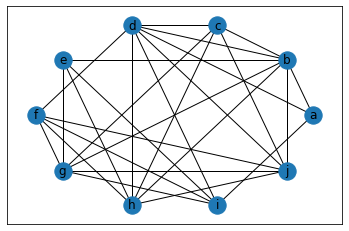

In [ ]:
import itertools #implements a number of iterator building blocks
import random

import networkx as nx
from matplotlib import pyplot as plt


nodes = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h','i','j']

# Generate Networkx Graph
G = nx.Graph()
G.add_nodes_from(nodes)

# randomly determine vertices
for (node1, node2) in itertools.combinations(nodes, 2):
    if random.uniform(0,1) < 0.5:
        G.add_edge(node1, node2)

# Draw generated graph
nx.draw_networkx(G, pos=nx.circular_layout(G), with_labels=True)

# Compute Page Rank
pr = nx.pagerank(G, alpha=0.85)


pr

In [ ]:
dolphins_graph = nx.Graph()
dolphins_graph = nx.read_gml('/content/dolphins.gml')

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
# The above script changes the default size of the Matplotlib plots to 10 x 8 inches.

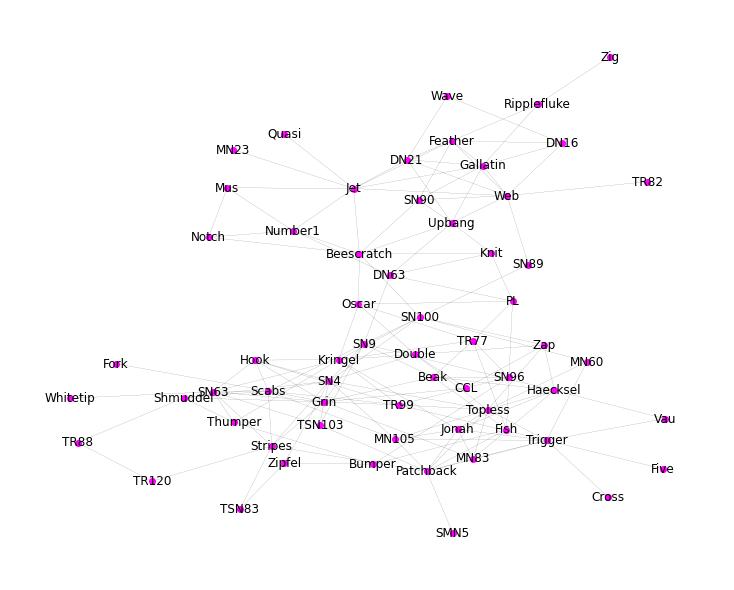

In [ ]:
options = {
    "node_color": "magenta",
    "node_size": 50,
    "linewidths": 0,
    "width": 0.1,
    "font_size":12
}

nx.draw_kamada_kawai(dolphins_graph, with_labels=True,**options)

In [ ]:
pr = nx.pagerank(dolphins_graph, alpha=0.45)
plt.show()
pr

{'Beak': 0.016962206735765765,
 'Beescratch': 0.024657779163893456,
 'Bumper': 0.013335733674746102,
 'CCL': 0.009627334957614968,
 'Cross': 0.005079101632863055,
 'DN16': 0.014434748216370162,
 'DN21': 0.020063144455665028,
 'DN63': 0.01564571966634353,
 'Double': 0.017095254673197,
 'Feather': 0.02347021551520822,
 'Fish': 0.015105623761720376,
 'Five': 0.005079101632863055,
 'Fork': 0.004834672050768328,
 'Gallatin': 0.026169925979057256,
 'Grin': 0.032137029718865714,
 'Haecksel': 0.019878693559467992,
 'Hook': 0.016623110455451107,
 'Jet': 0.0317411226125807,
 'Jonah': 0.01939089776938836,
 'Knit': 0.01293094177744182,
 'Kringel': 0.02463646831978113,
 'MN105': 0.016934972605708244,
 'MN23': 0.005417443345758518,
 'MN60': 0.009861995696270574,
 'MN83': 0.016901707992051738,
 'Mus': 0.011508033929094379,
 'Notch': 0.011213415672020617,
 'Number1': 0.0171355079823567,
 'Oscar': 0.014845201153005742,
 'PL': 0.015302368341419285,
 'Patchback': 0.026452435542402352,
 'Quasi': 0.0054174

## Hw5 Ex 2

In [ ]:
import pandas as pd
df = pd.read_csv('/content/NCAA2.csv')
df.head()

,GameId,GameDate,NeutralSite,AwayTeam,HomeTeam,Team,Home,Score,AST,TOV,STL,BLK,Rebounds,ORB,DRB,FGA,FGM,3FGM,3FGA,FTA,FTM,Fouls
0,1,1/1/2019 13:00,0,Notre Dame Fighting Irish,Virginia Tech Hokies,Notre Dame Fighting Irish,0,66,13,11,2,5,30,13,17,56,23,13,34,13,7,10
1,1,1/1/2019 13:00,0,Notre Dame Fighting Irish,Virginia Tech Hokies,Virginia Tech Hokies,1,81,19,7,5,1,24,2,22,55,33,11,18,5,4,13
2,2,1/3/2019 19:00,0,North Carolina State Wolfpack,Miami (FL) Hurricanes,Miami (FL) Hurricanes,1,82,12,7,7,1,27,9,18,61,28,10,25,29,16,14
3,2,1/3/2019 19:00,0,North Carolina State Wolfpack,Miami (FL) Hurricanes,North Carolina State Wolfpack,0,87,17,16,4,3,50,17,33,68,31,11,30,18,14,23
4,3,1/5/2019 3:27,0,Clemson Tigers,Duke Blue Devils,Clemson Tigers,0,68,14,16,6,2,35,9,26,63,27,6,15,12,8,16


In [ ]:
import numpy as np
scores = df.groupby('GameId')['Score'].diff().to_list()

In [ ]:
scores = [scores[idx+1]*(-1) if np.isnan(s) == True else s for idx,s in enumerate(scores)] 

In [ ]:
df['delta'] = scores
df.head()

,GameId,GameDate,NeutralSite,AwayTeam,HomeTeam,Team,Home,Score,AST,TOV,STL,BLK,Rebounds,ORB,DRB,FGA,FGM,3FGM,3FGA,FTA,FTM,Fouls,delta
0,1,1/1/2019 13:00,0,Notre Dame Fighting Irish,Virginia Tech Hokies,Notre Dame Fighting Irish,0,66,13,11,2,5,30,13,17,56,23,13,34,13,7,10,-15.0
1,1,1/1/2019 13:00,0,Notre Dame Fighting Irish,Virginia Tech Hokies,Virginia Tech Hokies,1,81,19,7,5,1,24,2,22,55,33,11,18,5,4,13,15.0
2,2,1/3/2019 19:00,0,North Carolina State Wolfpack,Miami (FL) Hurricanes,Miami (FL) Hurricanes,1,82,12,7,7,1,27,9,18,61,28,10,25,29,16,14,-5.0
3,2,1/3/2019 19:00,0,North Carolina State Wolfpack,Miami (FL) Hurricanes,North Carolina State Wolfpack,0,87,17,16,4,3,50,17,33,68,31,11,30,18,14,23,5.0
4,3,1/5/2019 3:27,0,Clemson Tigers,Duke Blue Devils,Clemson Tigers,0,68,14,16,6,2,35,9,26,63,27,6,15,12,8,16,-19.0


In [ ]:
edges = []
for idx,row in df.iterrows():
  if idx % 2 == 1:
    continue
  else:
    away = row[3]
    home = row[4]
    relative_team = row[5]
    delta = row[22]
    
    if relative_team == away:
      delta = -1* delta

    if delta > 0:
      winner = home
      loser = away
      points = delta
    elif delta <0:
      winner = away
      loser = home
      points = delta * -1
    else:
      continue

    edges.append((loser,winner,points)) 
edges[1]

('Miami (FL) Hurricanes', 'North Carolina State Wolfpack', 5.0)

In [ ]:
!pip install igraph

     |████████████████████████████████| 3.2 MB 7.6 MB/s 


In [ ]:
import igraph
from igraph import Graph
game_graph = igraph.Graph.TupleList(edges,weights=True,directed=True)#create the graph

In [ ]:
g=game_graph
igraph.plot(g, vertex_label = game_graph.vs['name'], )

AttributeError: ignored

In [ ]:
import operator
vectors = game_graph.pagerank()#creates the vector of rankings
e = {name:cen for cen, name in  zip([v for v in vectors],game_graph.vs['name'])}#we create a dict. with the names and scores
sorted_eigen = sorted(e.items(), key=operator.itemgetter(1),reverse=True)#we sort the teams accordingly the rankings
sorted_eigen

[('Duke Blue Devils', 0.18701215826953893),
 ('North Carolina Tar Heels', 0.15201923838621956),
 ('Virginia Cavaliers', 0.12424148988346527),
 ('Florida State Seminoles', 0.09481511469157541),
 ('Louisville Cardinals', 0.07752197728366199),
 ('Virginia Tech Hokies', 0.07310353575259473),
 ('Syracuse Orange', 0.0728390788302208),
 ('Clemson Tigers', 0.0366776772777835),
 ('Boston College Eagles', 0.0346795937311922),
 ('North Carolina State Wolfpack', 0.03397914060551954),
 ('Pittsburgh Panthers', 0.03379168787220402),
 ('Georgia Tech Yellow Jackets', 0.025552395760336584),
 ('Miami (FL) Hurricanes', 0.0194194243594586),
 ('Notre Dame Fighting Irish', 0.01755256066239208),
 ('Wake Forest Demon Deacons', 0.016794926633836707)]

# HW 6

Exercise 1.¶
This exercise is inspired by the following blog https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python/. We will use the Apriori algorithm to find rules that describe associations between different products given 7500 transactions over the course of a week at a French retail store. The dataset is available on the Moodle.

First, we import the Libraries:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori

In [ ]:
store_data = pd.read_csv('/content/store_data.csv', header=None)
store_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
records = []
for i in range(0, 7501):
    records.append([str(store_data.values[i,j]) for j in range(0, 20) if str(store_data.values[i,j]) != "nan"])
print(records[0:10])

[['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'], ['burgers', 'meatballs', 'eggs'], ['chutney'], ['turkey', 'avocado'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'], ['low fat yogurt'], ['whole wheat pasta', 'french fries'], ['soup', 'light cream', 'shallot'], ['frozen vegetables', 'spaghetti', 'green tea'], ['french fries']]


Find rules for items that are purchased at least 5 times a day, or  7×5=35  times in one week. As the dataset is for a one-week time period, the support for those items is  35/7500=0.0045 . Let fix the minimum confidence for the rules to 0.2 and lift to 3.

In [ ]:
association_rules = apriori(records, min_support=0.00933, min_confidence=0.2, min_lift=2, max_length=5)
association_results = list(association_rules)
print(len(association_results))

22


In [ ]:
print(association_results[0])

RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)])


In [ ]:
for item in association_results:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: chicken -> light cream
Support: 0.004532728969470737
Confidence: 0.29059829059829057
Lift: 4.84395061728395
Rule: escalope -> mushroom cream sauce
Support: 0.005732568990801226
Confidence: 0.3006993006993007
Lift: 3.790832696715049
Rule: escalope -> pasta
Support: 0.005865884548726837
Confidence: 0.3728813559322034
Lift: 4.700811850163794
Rule: herb & pepper -> ground beef
Support: 0.015997866951073192
Confidence: 0.3234501347708895
Lift: 3.2919938411349285
Rule: ground beef -> tomato sauce
Support: 0.005332622317024397
Confidence: 0.3773584905660377
Lift: 3.840659481324083
Rule: whole wheat pasta -> olive oil
Support: 0.007998933475536596
Confidence: 0.2714932126696833
Lift: 4.122410097642296
Rule: pasta -> shrimp
Support: 0.005065991201173177
Confidence: 0.3220338983050847
Lift: 4.506672147735896
Rule: chocolate -> frozen vegetables
Support: 0.005332622317024397
Confidence: 0.23255813953488375
Lift: 3.2545123221103784
Rule: spaghetti -> cooking oil
Support: 0.004799360085321957

# HW 7: Rec Systems

In [ ]:
import pyspark
conf = pyspark.SparkConf()
sc = pyspark.SparkContext(conf=conf)
network = sc.textFile("/content/soc-LiveJournal1Adj.txt")


Algorithm: for each user  𝑈 , the algorithm recommends  𝑁=10  users who are not already friends with  𝑈 , but have the most number of mutual friends in common with  𝑈 .


Output: The output contains one line per user in the following format:  <𝑈𝑠𝑒𝑟> <𝑇𝐴𝐵> <𝑅𝑒𝑐𝑜𝑚𝑚𝑒𝑛𝑑𝑎𝑡𝑖𝑜𝑛𝑠>  where  <𝑈𝑠𝑒𝑟>  is a unique ID corresponding to a user and  <𝑅𝑒𝑐𝑜𝑚𝑚𝑒𝑛𝑑𝑎𝑡𝑖𝑜𝑛𝑠>  is a comma separated list of unique IDs corresponding to the algorithm’s recommendation of people that  <𝑈𝑠𝑒𝑟>  might know, ordered in decreasing number of mutual friends.
If a user has less than 10 second-degree friends: output all of them in decreasing order of the number of mutual friends.
If a user has no friends, you can provide an empty list of recommendations. If there are recommended users with the same number of mutual friends, then output those user IDs in numerically ascending order.

In [ ]:
def mapper(line):
    data = line.split()
    u = data[0] # always exists
    
    result = []
    result.append(((u, u), 0))
    
    if len(data) == 1:
        return result

    V = data[1].split(",")

    for v in V:
        result.append(((u, v), 0))

    for v1 in V:
        for v2 in V:
            if v1 != v2:
                result.append(((v1, v2), 1))

    return result

def aggregateMutualFriends(values):
    if any(value == 0 for value in values):
        return 0
    else:
        return sum(values)

def sortRecs(values):
    sorted_recs = sorted(values, key = lambda rec_count: (-1 * rec_count[1], rec_count[0]))[:10]
    return [pair[0] for pair in sorted_recs]

mapped_data = network.flatMap(mapper)
reduced_data = mapped_data.groupByKey().mapValues(aggregateMutualFriends)


KeyboardInterrupt: ignored

In [ ]:
top_recs = reduced_data \
                .filter(lambda pair_count: pair_count[1] > 0) \
                .map(lambda pair_count: (pair_count[0][0], (pair_count[0][1], pair_count[1]))) \
                .groupByKey() \
                .mapValues(sortRecs)
top_recs

KeyboardInterrupt: ignored

In [ ]:
top_recs.saveAsTextFile("Q1_answer")

In [ ]:

sc.stop()